In [37]:
import numpy as np
from scipy.fftpack import fft, fftfreq
import matplotlib.pyplot as plt
import pandas as pd

In [38]:
mach_num = "0.8"

# 音圧スペクトルのフーリエ変換 

In [39]:
df1 = pd.read_csv(
    f"/Users/isseyshome/Downloads/ma{mach_num}_spectrum/spectrum1.csv"
    ,header=None)
df2 = pd.read_csv(
    f"/Users/isseyshome/Downloads/ma{mach_num}_spectrum/spectrum2.csv"
    ,header=None)
df3 = pd.read_csv(
    f"/Users/isseyshome/Downloads/ma{mach_num}_spectrum/spectrum3.csv"
    ,header=None)
df4 = pd.read_csv(
    f"/Users/isseyshome/Downloads/ma{mach_num}_spectrum/spectrum4.csv"
    ,header=None)
df1 = df1.rename(columns={0: 'spectrum'})
df2 = df2.rename(columns={0: 'spectrum'})
df3 = df3.rename(columns={0: 'spectrum'})
df4 = df4.rename(columns={0: 'spectrum'})
df1 = df1.astype('float64')
df2 = df2.astype('float64')
df3 = df3.astype('float64')
df4 = df4.astype('float64')
display(df1.dtypes)

#t=250の前に計算破綻してしまった計算でのスペクトル出力ファイルを扱う際に必要な処理
#NaNが最後に一件だけ入ってしまっているので削除
df_new1 = df1.dropna()
df_new2 = df2.dropna()
df_new3 = df3.dropna()
df_new4 = df4.dropna()

print(len(df_new1),len(df1))

spectrum    float64
dtype: object

15001 15001


In [40]:
#t=250の前に計算破綻してしまった計算でのスペクトル出力ファイルを扱う際に必要な処理
drop_index = df_new1.query('spectrum == 0').index
print("0で値が入っていないデータ数: ",len(drop_index))
df_new1 = df_new1.drop(drop_index)
df_new2 = df_new2.drop(drop_index)
df_new3 = df_new3.drop(drop_index)
df_new4 = df_new4.drop(drop_index)
print("有効データ数 : ",len(df_new1))

0で値が入っていないデータ数:  0
有効データ数 :  15001


In [41]:
y1 = df_new1.spectrum.values
y2 = df_new2.spectrum.values
y3 = df_new3.spectrum.values
y4 = df_new4.spectrum.values

N = len(y1)
display(N,y1)

15001

array([-0.00419179, -0.00412901, -0.00406632, ...,  0.00107094,
        0.00107087,  0.0010708 ])

In [42]:
dt = 0.01 # data step [s]
t = np.arange(100, N*dt+100, dt) # time
len(t)

15001

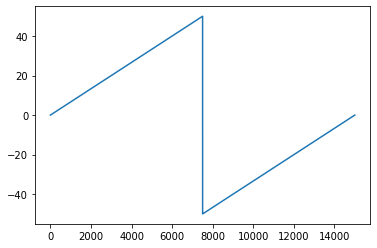

In [43]:
# 周波数スケール
freq = fftfreq(N, dt)
#上記でやっている内容は以下の式の[0:N/2]の範囲と合致する
# sampling = 1.0/dt #f_sample = 100Hz : 100Hzまでは計測可能である
# freq = np.linspace(0, sampling, N) # frequency step

plt.plot(freq)

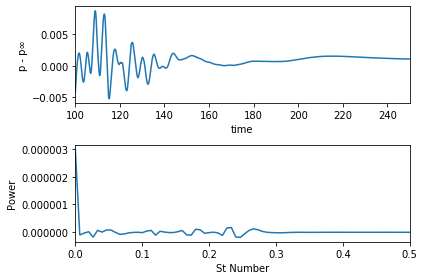

In [44]:
yf1 = fft(y1)/(N/2) # 離散フーリエ変換&正規化

plt.figure(2)
# plt.subplot(311)
plt.subplot(211)
plt.plot(t, y1)
plt.xlim(100, 250)
plt.xlabel("time")
plt.ylabel("p - p∞")

# plt.subplot(312)
# #(-1)^kがかかってきて正負がおかしくなるのでabsで絶対値を取る
# plt.plot(freq[0:int(N/2)], np.abs(yf1)[0:int(N/2)])
# plt.xlim(0,0.5)
# #plt.ylim(0, 5)
# # plt.xlabel("frequency")
# plt.ylabel("Amplitude")


# plt.subplot(313)
plt.subplot(212)
#パワースペクトルは振幅の2乗
plt.plot(freq[0:int(N/2)], (yf1**2)[0:int(N/2)])
plt.xlim(0,0.5)
#plt.ylim(0, 5)
# plt.xlabel("frequency")
plt.xlabel("St Number")
plt.ylabel("Power")

plt.tight_layout()
plt.savefig(f"/Users/isseyshome/Documents/Lab/#3 修士論文/Visual_result/Ma={mach_num}/spectrum/p_Jet_Inside",dpi=300)
plt.show()

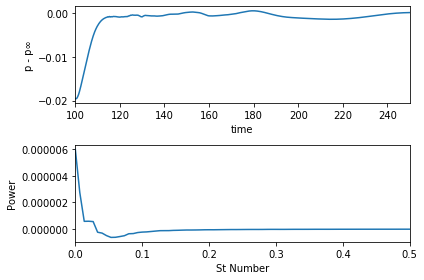

In [45]:
yf2 = fft(y2)/(N/2)# 離散フーリエ変換&正規化

plt.figure(2)
# plt.subplot(311)
plt.subplot(211)
plt.plot(t, y2)
plt.xlim(100, 250)
plt.xlabel("time")
plt.ylabel("p - p∞")

# plt.subplot(312)
# #(-1)^kがかかってきて正負がおかしくなるのでabsで絶対値を取る
# plt.plot(freq[0:int(N/2)], np.abs(yf2)[0:int(N/2)])
# plt.xlim(0,0.5)
# #plt.ylim(0, 5)
# # plt.xlabel("frequency")
# plt.ylabel("Amplitude")


# plt.subplot(313)
plt.subplot(212)
#パワースペクトルは振幅の2乗
plt.plot(freq[0:int(N/2)], (yf2**2)[0:int(N/2)])
plt.xlim(0,0.5)
#plt.ylim(0, 5)
# plt.xlabel("frequency")
plt.xlabel("St Number")
plt.ylabel("Power")

plt.tight_layout()
plt.savefig(f"/Users/isseyshome/Documents/Lab/#3 修士論文/Visual_result/Ma={mach_num}/spectrum/p_Back_Left",dpi=300)
plt.show()

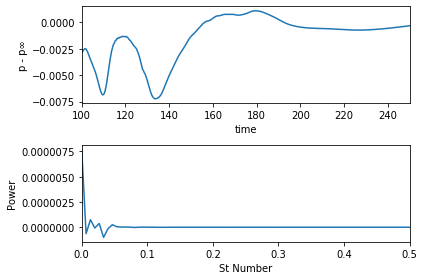

In [46]:
yf3 = fft(y3)/(N/2) # 離散フーリエ変換&正規化

plt.figure(2)
# plt.subplot(311)
plt.subplot(211)
plt.plot(t, y3)
plt.xlim(100, 250)
plt.xlabel("time")
plt.ylabel("p - p∞")

# plt.subplot(312)
# #(-1)^kがかかってきて正負がおかしくなるのでabsで絶対値を取る
# plt.plot(freq[0:int(N/2)], np.abs(yf3)[0:int(N/2)])
# plt.xlim(0,0.5)
# #plt.ylim(0, 5)
# # plt.xlabel("frequency")
# plt.ylabel("Amplitude")


# plt.subplot(313)
plt.subplot(212)
#パワースペクトルは振幅の2乗
plt.plot(freq[0:int(N/2)], (yf3**2)[0:int(N/2)])
plt.xlim(0,0.5)
#plt.ylim(0, 5)
# plt.xlabel("frequency")
plt.xlabel("St Number")
plt.ylabel("Power")

plt.tight_layout()
plt.savefig(f"/Users/isseyshome/Documents/Lab/#3 修士論文/Visual_result/Ma={mach_num}/spectrum/p_Back_Right",dpi=300)
plt.show()

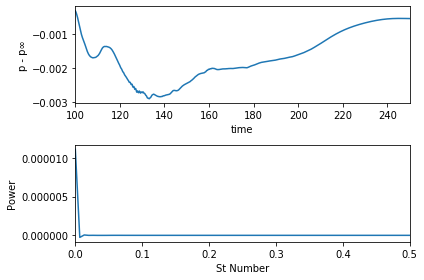

In [47]:
yf4 = fft(y4)/(N/2) # 離散フーリエ変換&正規化

plt.figure(2)
# plt.subplot(311)
plt.subplot(211)
plt.plot(t, y4)
plt.xlim(100, 250)
plt.xlabel("time")
plt.ylabel("p - p∞")

# plt.subplot(312)
# #(-1)^kがかかってきて正負がおかしくなるのでabsで絶対値を取る
# plt.plot(freq[0:int(N/2)], np.abs(yf4)[0:int(N/2)])
# plt.xlim(0,0.5)
# #plt.ylim(0, 5)
# # plt.xlabel("frequency")
# plt.ylabel("Amplitude")


# plt.subplot(313)
plt.subplot(212)
#パワースペクトルは振幅の2乗
plt.plot(freq[0:int(N/2)], (yf4**2)[0:int(N/2)])
plt.xlim(0,0.5)
#plt.ylim(0, 5)
# plt.xlabel("frequency")
plt.xlabel("St Number")
plt.ylabel("Power")

plt.tight_layout()
plt.savefig(f"/Users/isseyshome/Documents/Lab/#3 修士論文/Visual_result/Ma={mach_num}/spectrum/p_Middle_Right",dpi=300)
plt.show()

# 以下はdu/dxで速度乱れを出す

In [48]:
df_sp1 = pd.read_csv(
    f"/Users/isseyshome/Downloads/ma{mach_num}_spectrum/turbulent_check_1.csv"
    ,header=None)
df_sp2 = pd.read_csv(
    f"/Users/isseyshome/Downloads/ma{mach_num}_spectrum/turbulent_check_2.csv"
    ,header=None)
df_sp3 = pd.read_csv(
    f"/Users/isseyshome/Downloads/ma{mach_num}_spectrum/turbulent_check_3.csv"
    ,header=None)
df_sp4 = pd.read_csv(
    f"/Users/isseyshome/Downloads/ma{mach_num}_spectrum/turbulent_check_4.csv"
    ,header=None)
df_sp1 = df_sp1.rename(columns={0: 'dudx'})
df_sp1 = df_sp1.astype('float64')
df_sp2 = df_sp2.rename(columns={0: 'dudx'})
df_sp2 = df_sp2.astype('float64')
df_sp3 = df_sp3.rename(columns={0: 'dudx'})
df_sp3 = df_sp3.astype('float64')
df_sp4 = df_sp4.rename(columns={0: 'dudx'})
df_sp4 = df_sp4.astype('float64')

display(df_sp1.dtypes)

#t=250の前に計算破綻してしまった計算でのスペクトル出力ファイルを扱う際に必要な処理
#NaNが最後に一件だけ入ってしまっているので削除
df_sp_new1 = df_sp1.dropna()
df_sp_new2 = df_sp2.dropna()
df_sp_new3 = df_sp3.dropna()
df_sp_new4 = df_sp4.dropna()

print(len(df_sp_new1),len(df_sp1))

dudx    float64
dtype: object

15001 15001


In [49]:
#t=250の前に計算破綻してしまった計算でのスペクトル出力ファイルを扱う際に必要な処理
drop_index = df_sp_new1.query('dudx == 0').index
print("0で値が入っていないデータ数: ",len(drop_index))
df_sp_new1 = df_sp_new1.drop(drop_index)
df_sp_new2 = df_sp_new2.drop(drop_index)
df_sp_new3 = df_sp_new3.drop(drop_index)
df_sp_new4 = df_sp_new4.drop(drop_index)
print("有効データ数 : ",len(df_sp_new1))

0で値が入っていないデータ数:  0
有効データ数 :  15001


In [50]:
ys1 = df_sp_new1.dudx.values
ys2 = df_sp_new2.dudx.values
ys3 = df_sp_new3.dudx.values
ys4 = df_sp_new4.dudx.values
Ns = len(ys1)
display(Ns,ys1)

15001

array([ 0.02245928,  0.02246082,  0.02245802, ..., -0.00542762,
       -0.00542753, -0.00542745])

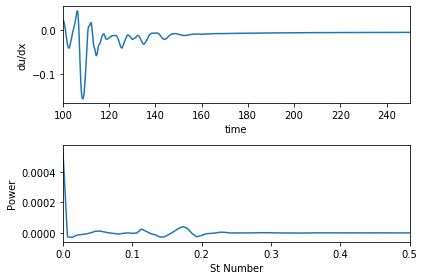

In [51]:
yf_s1 = fft(ys1)/(Ns/2) # 離散フーリエ変換&正規化

plt.figure(2)
# plt.subplot(311)
plt.subplot(211)
plt.plot(t, ys1)
plt.xlim(100, 250)
plt.xlabel("time")
plt.ylabel("du/dx")

# plt.subplot(312)
# #(-1)^kがかかってきて正負がおかしくなるのでabsで絶対値を取る
# plt.plot(freq[0:int(Ns/2)], np.abs(yf_s1)[0:int(Ns/2)])
# plt.xlim(0,0.5)
# #plt.ylim(0, 5)
# # plt.xlabel("frequency")
# plt.ylabel("Amplitude")


# plt.subplot(313)
plt.subplot(212)
plt.plot(freq[0:int(Ns/2)], (yf_s1**2)[0:int(Ns/2)])
plt.xlim(0,0.5)
#plt.ylim(0, 5)
# plt.xlabel("frequency")
plt.xlabel("St Number")
plt.ylabel("Power")

plt.tight_layout()
plt.savefig(f"/Users/isseyshome/Documents/Lab/#3 修士論文/Visual_result/Ma={mach_num}/spectrum/dudx_Jet_Inside",dpi=300)
plt.show()

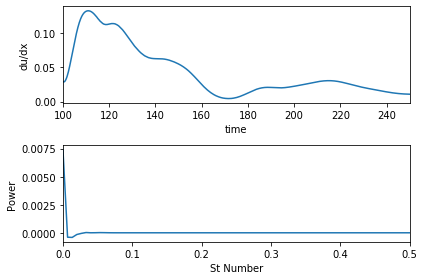

In [52]:
yf_s2 = fft(ys2)/(Ns/2) # 離散フーリエ変換&正規化

plt.figure(2)
# plt.subplot(311)
plt.subplot(211)
plt.plot(t, ys2)
plt.xlim(100, 250)
plt.xlabel("time")
plt.ylabel("du/dx")

# plt.subplot(312)
# #(-1)^kがかかってきて正負がおかしくなるのでabsで絶対値を取る
# plt.plot(freq[0:int(Ns/2)], np.abs(yf_s2)[0:int(Ns/2)])
# plt.xlim(0,0.5)
# #plt.ylim(0, 5)
# # plt.xlabel("frequency")
# plt.ylabel("Amplitude")


# plt.subplot(313)
plt.subplot(212)
plt.plot(freq[0:int(Ns/2)], (yf_s2**2)[0:int(Ns/2)])
plt.xlim(0,0.5)
#plt.ylim(0, 5)
# plt.xlabel("frequency")
plt.xlabel("St Number")
plt.ylabel("Power")

plt.tight_layout()
plt.savefig(f"/Users/isseyshome/Documents/Lab/#3 修士論文/Visual_result/Ma={mach_num}/spectrum/dudx_Back_Left",dpi=300)
plt.show()

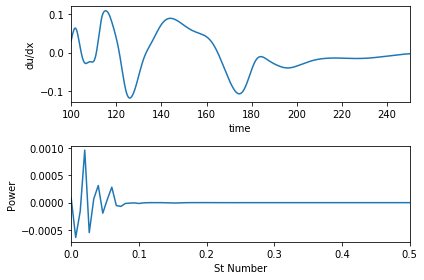

In [53]:
yf_s3 = fft(ys3)/(Ns/2) # 離散フーリエ変換&正規化

plt.figure(2)
# plt.subplot(311)
plt.subplot(211)
plt.plot(t, ys3)
plt.xlim(100, 250)
plt.xlabel("time")
plt.ylabel("du/dx")

# plt.subplot(312)
# #(-1)^kがかかってきて正負がおかしくなるのでabsで絶対値を取る
# plt.plot(freq[0:int(Ns/2)], np.abs(yf_s3)[0:int(Ns/2)])
# plt.xlim(0,0.5)
# #plt.ylim(0, 5)
# # plt.xlabel("frequency")
# plt.ylabel("Amplitude")


# plt.subplot(313)
plt.subplot(212)
plt.plot(freq[0:int(Ns/2)], (yf_s3**2)[0:int(Ns/2)])
plt.xlim(0,0.5)
#plt.ylim(0, 5)
# plt.xlabel("frequency")
plt.xlabel("St Number")
plt.ylabel("Power")

plt.tight_layout()
plt.savefig(f"/Users/isseyshome/Documents/Lab/#3 修士論文/Visual_result/Ma={mach_num}/spectrum/dudx_Back_Right",dpi=300)
plt.show()

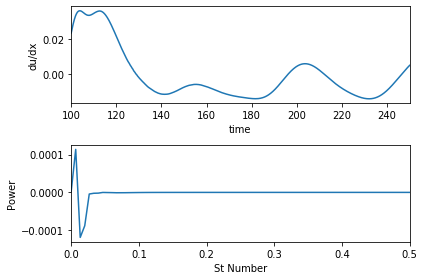

In [54]:
yf_s4 = fft(ys4)/(Ns/2) # 離散フーリエ変換&正規化

plt.figure(2)
# plt.subplot(311)
plt.subplot(211)
plt.plot(t, ys4)
plt.xlim(100, 250)
plt.xlabel("time")
plt.ylabel("du/dx")

# plt.subplot(312)
# #(-1)^kがかかってきて正負がおかしくなるのでabsで絶対値を取る
# plt.plot(freq[0:int(Ns/2)], np.abs(yf_s4)[0:int(Ns/2)])
# plt.xlim(0,0.5)
# #plt.ylim(0, 5)
# # plt.xlabel("frequency")
# plt.ylabel("Amplitude")


# plt.subplot(313)
plt.subplot(212)
plt.plot(freq[0:int(Ns/2)], (yf_s4**2)[0:int(Ns/2)])
plt.xlim(0,0.5)
#plt.ylim(0, 5)
# plt.xlabel("frequency")
plt.xlabel("St Number")
plt.ylabel("Power")

plt.tight_layout()
plt.savefig(f"/Users/isseyshome/Documents/Lab/#3 修士論文/Visual_result/Ma={mach_num}/spectrum/dudx_Middle_Right",dpi=300)
plt.show()